In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import unicodedata

In [3]:
raw_data_train = pd.read_excel("Data_Train.xlsx")
raw_data_test = pd.read_excel("Data_Test.xlsx")

In [ ]:
cd Hackathon

In [4]:
raw_data_train

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3.0
1,How formidable is the opposition alliance amon...,0.0
2,Most Asian currencies were trading lower today...,3.0
3,"If you want to answer any question, click on ‘...",1.0
4,"In global markets, gold prices edged up today ...",3.0
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0.0
7624,"The film, which also features Janhvi Kapoor, w...",2.0
7625,The database has been created after bringing t...,1.0
7626,"The state, which has had an uneasy relationshi...",0.0


<AxesSubplot:xlabel='SECTION', ylabel='count'>

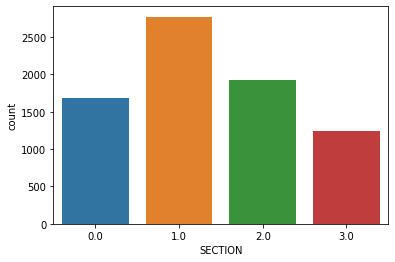

In [5]:
sns.countplot(x="SECTION", data=raw_data_train)

In [6]:
# clean text
def clean_text(string):
    string = re.sub("\n", " ", string) # remove new line character
    string = re.sub("\t", " ", string) # remove tabs
    string = unicodedata.normalize("NFKD",string).encode("ascii", errors="ignore").decode() # remove non-ascii weird characters
    string = re.sub(" +", " ", string) # remove multiple spaces
    string = re.sub("^ ", " ", string) # remove space at start
    string = re.sub(" $", " ", string) # remove space at end
    
    return string

In [8]:
raw_data_train["STORY"] = raw_data_train["STORY"].apply(clean_text)

In [21]:
data_test = raw_data_test["STORY"].apply(clean_text)
data_test

0       2019 will see gadgets like gaming smartphones ...
1       It has also unleashed a wave of changes in the...
2       It can be confusing to pick the right smartpho...
3       The mobile application is integrated with a da...
4       We have rounded up some of the gadgets that sh...
                              ...                        
2743    According to researchers, fraud in the mobile ...
2744    The iPhone XS and XS Max share the Apple A12 c...
2745    On the photography front, the Note 5 Pro featu...
2746    UDAY mandated that discoms bring the gap betwe...
2747    Ripple also helps bank customers send money to...
Name: STORY, Length: 2748, dtype: object

In [9]:
raw_data_train["STORY"]

0       But the most painful was the huge reversal in ...
1       How formidable is the opposition alliance amon...
2       Most Asian currencies were trading lower today...
3       If you want to answer any question, click on A...
4       In global markets, gold prices edged up today ...
                              ...                        
7623    Karnataka has been a Congress bastion, but it ...
7624    The film, which also features Janhvi Kapoor, w...
7625    The database has been created after bringing t...
7626    The state, which has had an uneasy relationshi...
7627    Virus stars Kunchacko Boban, Tovino Thomas, In...
Name: STORY, Length: 7628, dtype: object

In [10]:
# remove duplicates
print(f"initial length: {len(raw_data_train)}")
raw_data_train.drop_duplicates(subset="STORY",inplace=True)
print(f"final length: {len(raw_data_train)}")

initial length: 7628
final length: 7548


In [11]:
# remove empty
print(f"initial length: {len(raw_data_train)}")
raw_data_train['STORY'].replace('', np.nan, inplace=True)
raw_data_train.dropna(inplace=True)
print(f"final length: {len(raw_data_train)}")

initial length: 7548
final length: 7548


In [12]:
# prepare dataset
data_train = raw_data_train
data_train.columns = ['text','label']
data_train["label"] = data_train["label"].apply(int)
data_train

,text,label
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on A...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


In [13]:
# load transformers model
from simpletransformers.classification import ClassificationModel

In [19]:
# Load model

model_args = {
    "num_train_epochs": 1, "learning_rate": 1e-4, "overwrite_output_dir": True, "number_of_labels": 4
}

model = ClassificationModel(
    model_type = "distilbert",
    model_name = "distilbert-base-uncased",
    args=model_args,
    num_labels=4,
    use_cuda=False)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classi

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [22]:
# train
model.train_model(data_train)

  0%|          | 0/7548 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/944 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/944 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/944 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/944 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/944 [00:00<?, ?it/s]

(4720, 0.09341302353642138)

In [ ]:
# validate


In [23]:
# predict

predictions, raw_outputs = model.predict(list(data_test))

  0%|          | 0/2748 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

In [28]:
predictions = pd.DataFrame(predictions)
predictions.columns = ["SECTION"]
predictions

,SECTION
0,1
1,2
2,1
3,1
4,1
...,...
2743,1
2744,1
2745,1
2746,3


In [30]:
predictions.to_excel('results.xlsx',index=False)